<a href="https://colab.research.google.com/github/my-quach/R-AI/blob/main/2.11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.1 MB/s eta 0:00:00


7.0


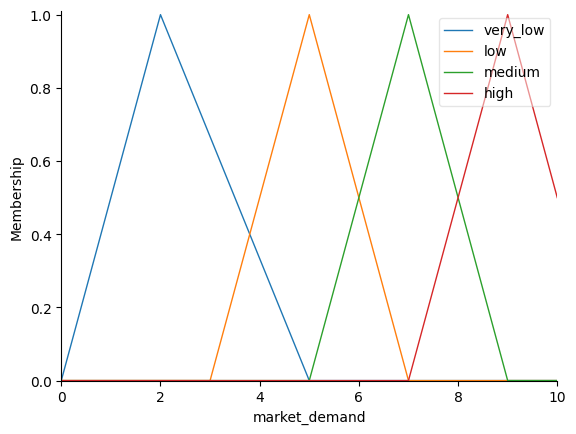

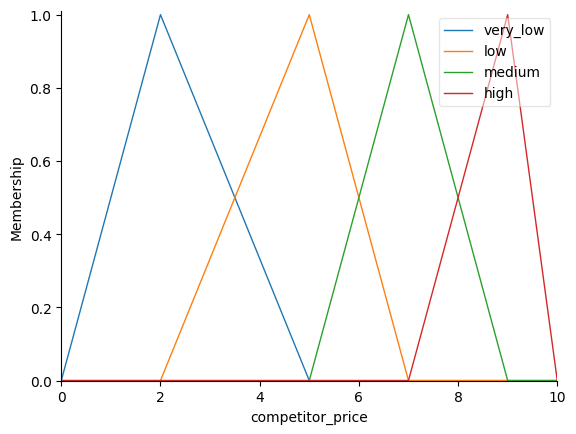

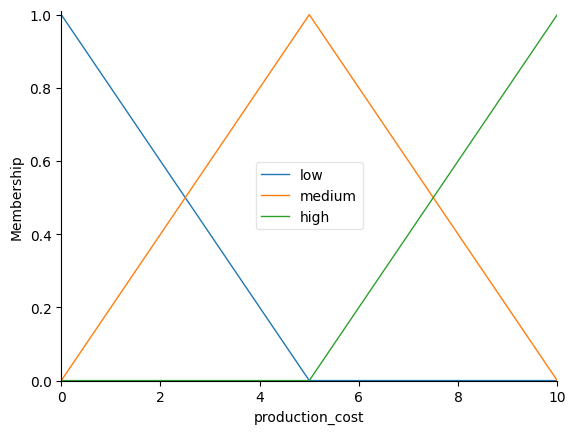

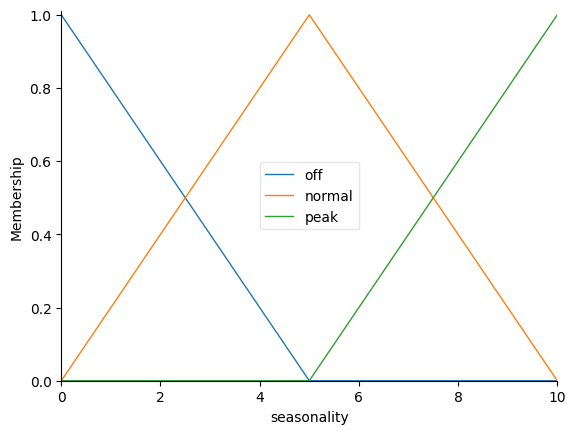

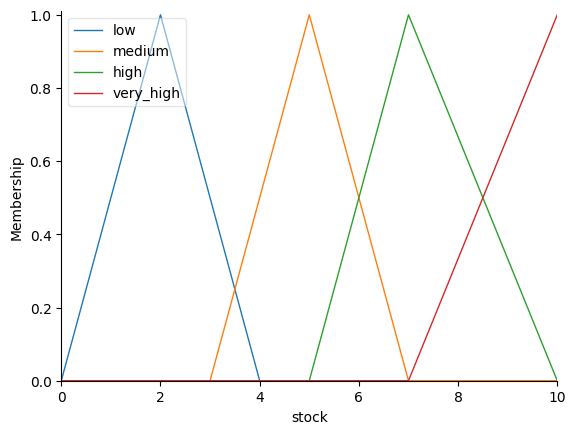

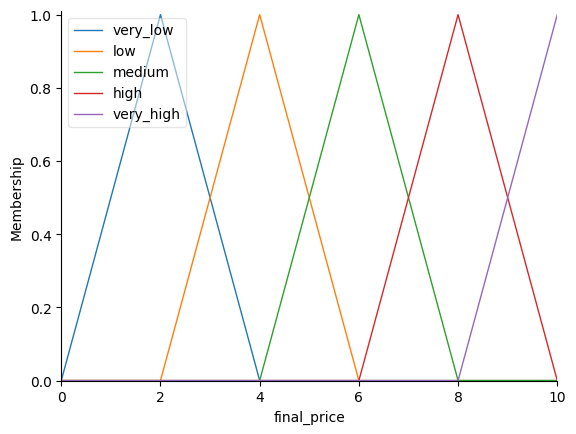

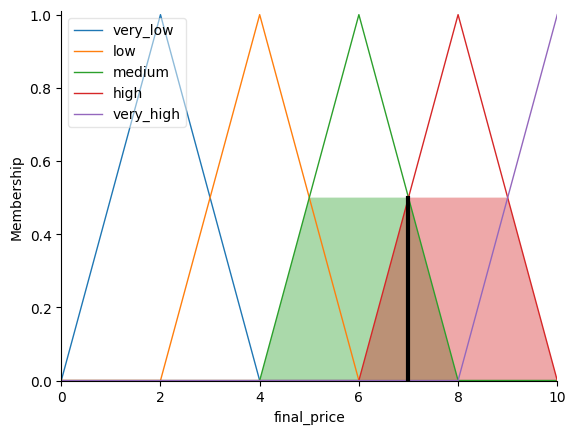

In [3]:
from typing_extensions import final
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

market_demand=ctrl.Antecedent(np.arange(0,11,1),'market_demand')
competitor_price=ctrl.Antecedent(np.arange(0,11,1),'competitor_price')
production_cost=ctrl.Antecedent(np.arange(0,11,1),'production_cost')
seasonality=ctrl.Antecedent(np.arange(0,11,1),'seasonality')
stock=ctrl.Antecedent(np.arange(0,11,1),'stock')

final_price=ctrl.Consequent(np.arange(0,11,1),'final_price')

market_demand['very_low']=fuzz.trimf(market_demand.universe,[0,2,5])
market_demand['low']=fuzz.trimf(market_demand.universe,[3,5,7])
market_demand['medium']=fuzz.trimf(market_demand.universe,[5,7,9])
market_demand['high']=fuzz.trimf(market_demand.universe,[7,9,11])

competitor_price['very_low']=fuzz.trimf(competitor_price.universe,[0,2,5])
competitor_price['low']=fuzz.trimf(competitor_price.universe,[2,5,7])
competitor_price['medium']=fuzz.trimf(competitor_price.universe,[5,7,9])
competitor_price['high']=fuzz.trimf(competitor_price.universe,[7,9,10])

production_cost['low']=fuzz.trimf(production_cost.universe,[0,0,5])
production_cost['medium']=fuzz.trimf(production_cost.universe,[0,5,10])
production_cost['high']=fuzz.trimf(production_cost.universe,[5,10,10])

seasonality['off']=fuzz.trimf(seasonality.universe,[0,0,5])
seasonality['normal']=fuzz.trimf(seasonality.universe,[0,5,10])
seasonality['peak']=fuzz.trimf(seasonality.universe,[5,10,10])

stock['low']=fuzz.trimf(stock.universe,[0,2,4])
stock['medium']=fuzz.trimf(stock.universe,[3,5,7])
stock['high']=fuzz.trimf(stock.universe,[5,7,10])
stock['very_high']=fuzz.trimf(stock.universe,[7,10,10])

final_price['very_low']=fuzz.trimf(final_price.universe,[0,2,4])
final_price['low']=fuzz.trimf(final_price.universe,[2,4,6])
final_price['medium']=fuzz.trimf(final_price.universe,[4,6,8])
final_price['high']=fuzz.trimf(final_price.universe,[6,8,10])
final_price['very_high']=fuzz.trimf(final_price.universe,[8,10,10])

market_demand.view()
competitor_price.view()
production_cost.view()
seasonality.view()
stock.view()
final_price.view()

# gia rat cao
rule1=ctrl.Rule(market_demand['high']&competitor_price['high']&stock['low'],final_price['very_high'])
rule2=ctrl.Rule(market_demand['high']&seasonality['peak']&stock['low'],final_price['very_high'])
rule3=ctrl.Rule(market_demand['medium']&production_cost['high']&stock['low'],final_price['very_high'])
# gia cao
rule4=ctrl.Rule(market_demand['high']&competitor_price['medium']&stock['medium'],final_price['high'])
rule5=ctrl.Rule(market_demand['medium']&competitor_price['high']&stock['high'],final_price['high'])
rule6=ctrl.Rule(market_demand['medium']&seasonality['peak']&stock['medium'],final_price['high'])
# gia trung binh
rule7=ctrl.Rule(market_demand['medium']&competitor_price['medium']&stock['medium'],final_price['medium'])
rule8=ctrl.Rule(market_demand['medium']&competitor_price['high']&stock['medium'],final_price['medium'])
rule9=ctrl.Rule(market_demand['low']&competitor_price['high']&stock['medium'],final_price['medium'])
rule10=ctrl.Rule(market_demand['medium']&production_cost['medium']&stock['medium'],final_price['medium'])
# gia thap (gia canh tranh)
rule11=ctrl.Rule(market_demand['low']&competitor_price['low']&stock['high'],final_price['low'])
rule12=ctrl.Rule(market_demand['low']&seasonality['off']&stock['high'],final_price['low'])
rule13=ctrl.Rule(market_demand['medium']&production_cost['low']&stock['high'],final_price['low'])
#gia rat thap (giam gia hoac thanh ly)
rule14=ctrl.Rule(market_demand['low']&competitor_price['low']&stock['very_high'],final_price['very_low'])
rule15=ctrl.Rule(market_demand['very_low']&seasonality['off']&stock['very_high'],final_price['very_low'])
rule16=ctrl.Rule(market_demand['medium']&competitor_price['very_low']&stock['very_high'],final_price['very_low'])

final_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16])
final_price_sim=ctrl.ControlSystemSimulation(final_ctrl)
final_price_sim.input['market_demand']=8
final_price_sim.input['competitor_price']=9
final_price_sim.input['production_cost']=5
final_price_sim.input['seasonality']=16
final_price_sim.input['stock']=4
final_price_sim.compute()
print(final_price_sim.output['final_price'])
final_price.view(sim=final_price_sim)